In [1]:
#Basics
import numpy as np
import pandas as pd
from math import sqrt
import itertools
from IPython.display import Markdown, display


#Viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette='colorblind') #set theme for all viz


#Modules
import wrangle as wr

In [23]:
#Using a function to pull the combined weather and energy demand data:
df = wr.get_combined_df()
#add in mean_temp
df['mean_temp'] = (df.hs_temp + df.gv_temp + df.pl_temp + df.vc_temp)/4
train = df[:'2017']

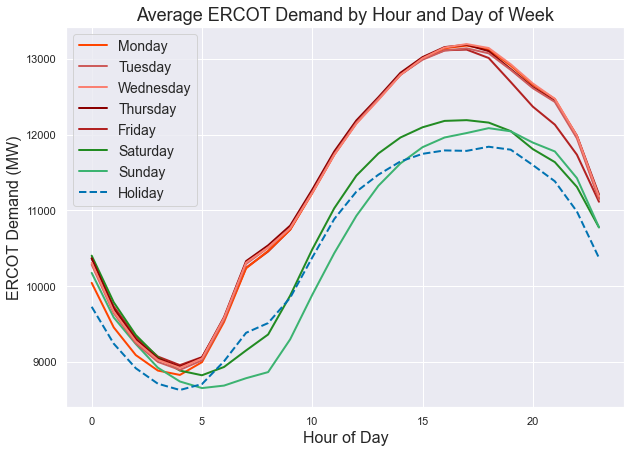

In [24]:
reg_days = train[train.is_obs_holiday == 0].copy()
ax = reg_days.groupby([reg_days.dow, reg_days.index.hour]).ercot_load.mean().unstack(0).plot(figsize=(10,7),lw=2,color=['firebrick','orangered','forestgreen','mediumseagreen','darkred','indianred','salmon'])
holly_days = train[train.is_obs_holiday == 1].copy()
holly_days.groupby([holly_days.index.hour]).ercot_load.mean().plot(label = 'Holiday', ax = ax, ls = '--',lw=2)
#Reorder legend
handles, labels = ax.get_legend_handles_labels()
handles = [handles[1]] + handles[5:7] + [handles[4]] + [handles[0]] + handles[2:4] + [handles[7]]
labels = [labels[1]] + labels[5:7] + [labels[4]] + [labels[0]] + labels[2:4] + [labels[7]]
plt.title('Average ERCOT Demand by Hour and Day of Week',fontsize=18)
plt.xlabel('Hour of Day',fontsize=16)
plt.ylabel('ERCOT Demand (MW)',fontsize=16)
#plt.legend()
plt.legend(handles=handles,labels=labels,title=None,fontsize=14);


In [42]:
def yticks_k(ax):
    '''
    Formats the y axis ticks to thousands for axes subplots.
    Returns: None
    Inputs: 
        (R) ax: AxesSubplot
    '''
    #Get yticks and format them
    ylabels = ['{:,.1f}'.format(y) + 'K' for y in ax.get_yticks()/1000];
    #Force yticks (handles user interaction)
    ax.set_yticks(ax.get_yticks());
    ax.set_yticklabels(ylabels,fontsize=13);
    return None

In [50]:
xticks

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.])

In [61]:
ax.get_xticks()

array([350544, 350640, 359400, 368160, 376944, 385704, 394464, 403224,
       412008, 420767])

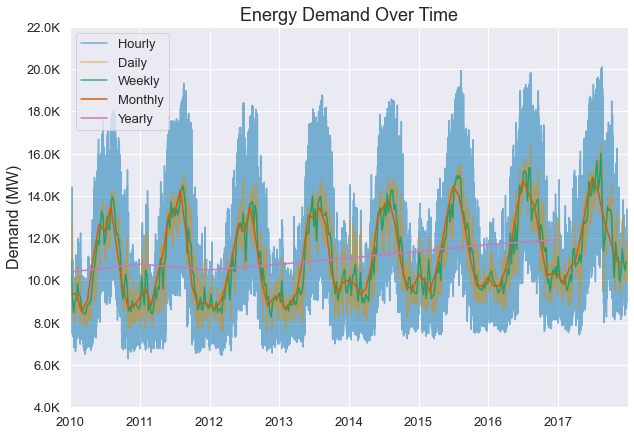

In [65]:
plt.figure(figsize=(10,7))

ax = train.resample('H').ercot_load.mean().plot(alpha=.5, label='Hourly')
train.resample('D').ercot_load.mean().plot(alpha=.5, label='Daily')
train.resample('W').ercot_load.mean().plot(alpha=.8, label='Weekly')
train.resample('M').ercot_load.mean().plot(label='Monthly')
train.resample('Y').ercot_load.mean().plot(label='Yearly')
plt.xlabel('')
yticks_k(ax)
# ax.set_xticklabels(ax.get_xticks(),fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Demand (MW)', fontsize = 16)
plt.title('Energy Demand Over Time', fontsize = 18)
plt.legend(fontsize=13);

